## **E-Commerce Customer Segmentation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import numpy as np
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from google.colab import files
import io

In [3]:
data=files.upload()

Saving data.csv to data.csv


In [4]:
data1 = pd.read_csv(io.StringIO(data['data.csv'].decode("ISO-8859-1")))

In [5]:
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
data1.shape

(541909, 8)

In [8]:
data1.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
data1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: xlabel='Percent missing', ylabel='Feature'>

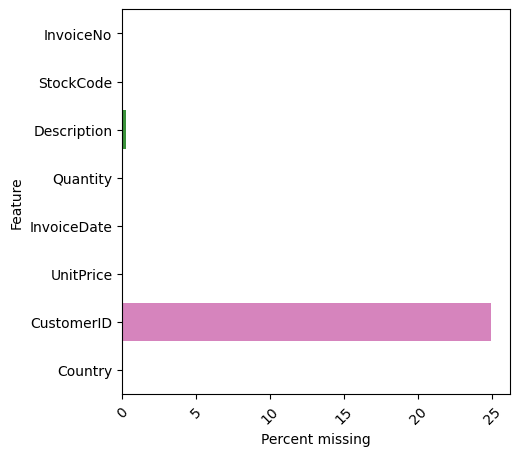

In [12]:
null_vals = data1.isnull().sum()/len(data1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (5,5))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [13]:
datas = data1.dropna(subset = ["CustomerID","Description"])

In [15]:
df = datas.drop_duplicates()
df.shape

(401604, 8)

In [17]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  

In [20]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


# **Calculate Aggregates**

In [21]:
df1 = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice': 'sum'})
df1.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)


In [22]:
df1.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


  

1.   Recency is how many days since last transaction for each customer    

2.   Frequency ishow frequently does a customer shop

3.   Monetary is the total spending of each customer






In [25]:
df1 = df1[(df1 > 0).all(1)]
df1.shape


(4322, 3)

**DATA PRE-PROCESSING**

In [26]:
df1.describe()

,Recency,Frequency,Monetary
count,4322.000000,4322.000000,4.322000e+03
mean,90.343591,92.850764,1.918498e+03
std,99.133565,230.357168,8.262490e+03
min,1.000000,1.000000,1.776357e-15
25%,17.000000,18.000000,3.005975e+02
50%,49.500000,42.000000,6.533250e+02
75%,138.000000,101.000000,1.624118e+03
max,374.000000,7812.000000,2.794890e+05


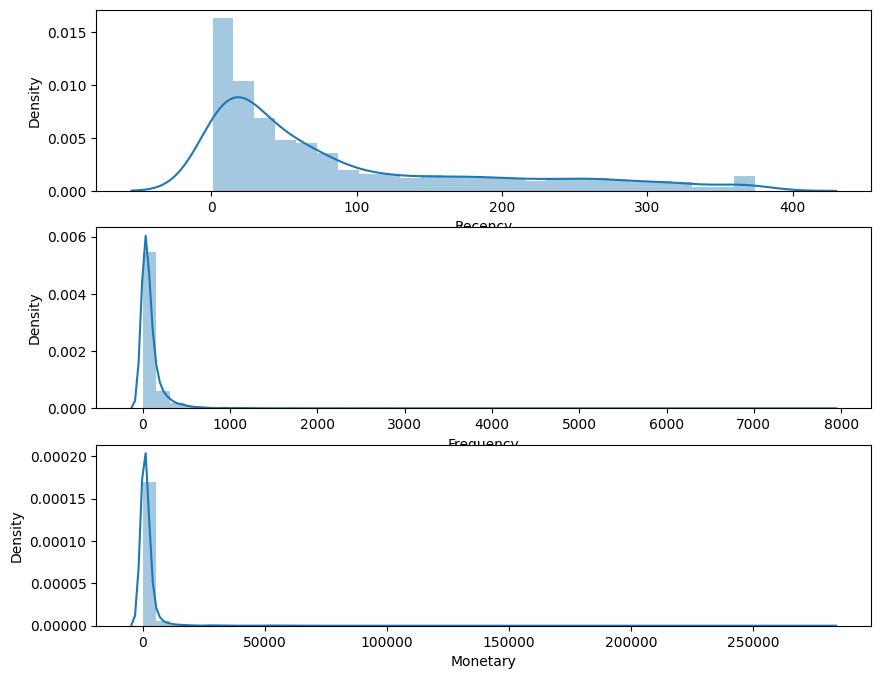

In [28]:
#Plot RFM Distribution
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1); sns.distplot(df1['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df1['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df1['Monetary'])
plt.show()

The means and standard deviations are so different. So, we need to transform the data to meet the requirements

In [29]:
df2 = (np.log(df1 + 1))

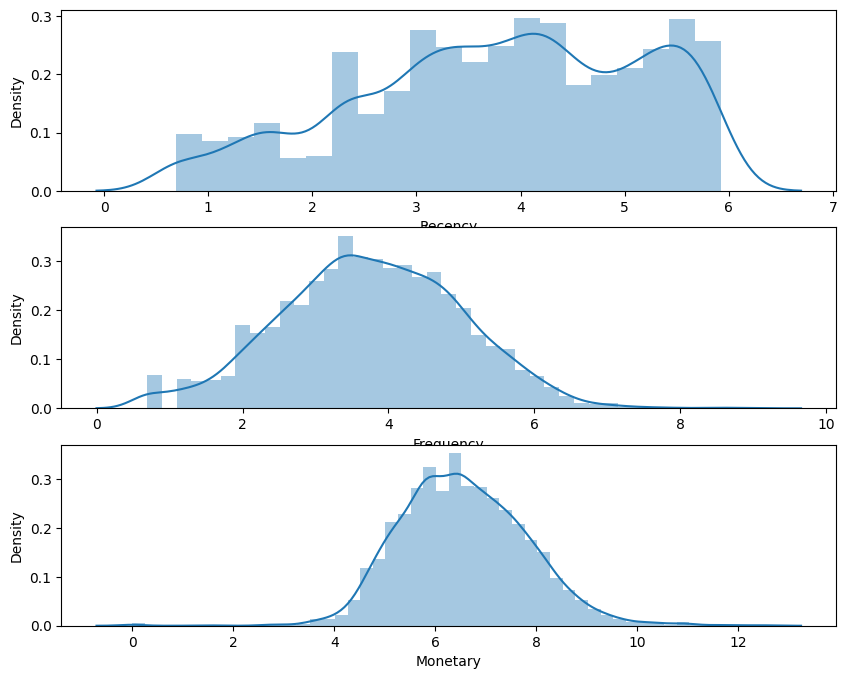

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1); sns.distplot(df2['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df2['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df2['Monetary'])
plt.show()

Scaling of data

In [31]:
scaler = StandardScaler() 
scaler.fit(df2)
df3 = pd.DataFrame(scaler.transform(df2))
df3.columns = df2.columns
df3.describe()

,Recency,Frequency,Monetary
count,4.322000e+03,4.322000e+03,4.322000e+03
mean,2.318059e-16,5.178643e-17,-1.315211e-17
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-2.266647e+00,-2.479228e+00,-5.190991e+00
25%,-6.549258e-01,-6.596716e-01,-6.733421e-01
50%,1.017447e-01,4.572291e-04,-6.046579e-02
75%,8.444762e-01,6.985821e-01,6.594114e-01
max,1.572466e+00,4.205135e+00,4.732577e+00


# **K-means clustering**

In [32]:
k_means = KMeans(n_clusters=2, random_state=1)

In [33]:
k_means.fit(df3)
clus_labels = k_means.labels_

In [34]:
df1_clus2 = df1.assign(Cluster = clus_labels)
print(df1_clus2.shape)
df1_clus2.head(2)

(4322, 4)


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,1


In [35]:
df1_clus2.groupby(['Cluster']).agg({ 'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          29.0     177.0   3774.0  1922
1         139.0      25.0    432.0  2400

 To determine the optimal value of K we use:

*   Elbow plot 
*   Silhoutte plot



1.Elbow Plot

In [36]:
ss_error = {}
for k in range(1, 20):
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(df3)
    ss_error[k] = k_means.inertia_

<Axes: title={'center': 'Elbow plot'}, xlabel='Value of k', ylabel='Sum of squared error'>

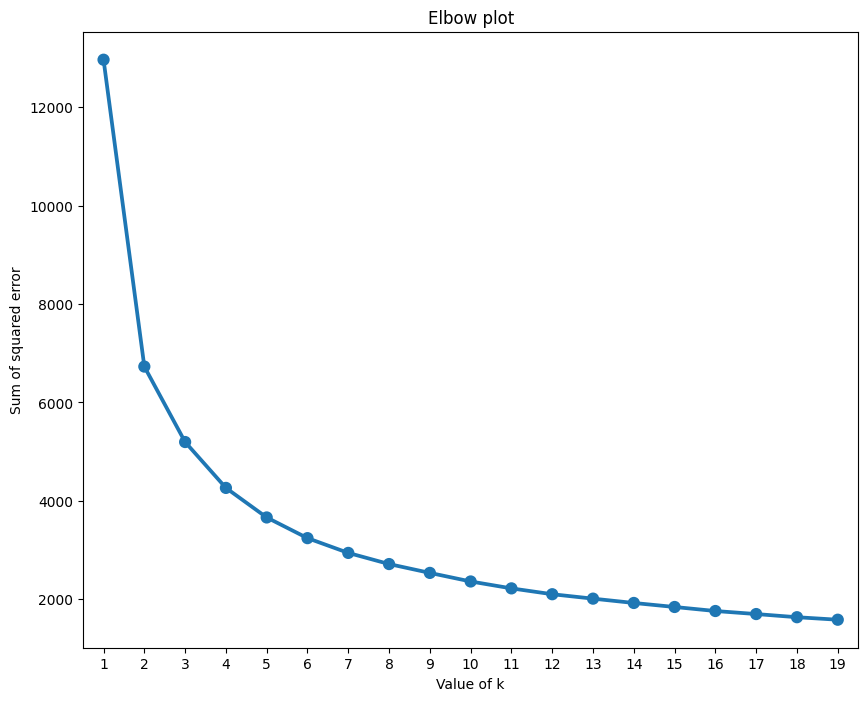

In [38]:
plt.figure(figsize = (10,8))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))

2. Silhoutte plot

For n_clusters = 2 The average silhouette_score is : 0.40113109649935497
For n_clusters = 3 The average silhouette_score is : 0.30594691594368906
For n_clusters = 4 The average silhouette_score is : 0.3119398793905789
For n_clusters = 5 The average silhouette_score is : 0.27803628164276756
For n_clusters = 6 The average silhouette_score is : 0.27439906768981837
For n_clusters = 7 The average silhouette_score is : 0.2655959674338407
For n_clusters = 8 The average silhouette_score is : 0.2580733937360461
For n_clusters = 10 The average silhouette_score is : 0.2620581162539837
For n_clusters = 12 The average silhouette_score is : 0.2658822355651038
For n_clusters = 14 The average silhouette_score is : 0.24870127428211855


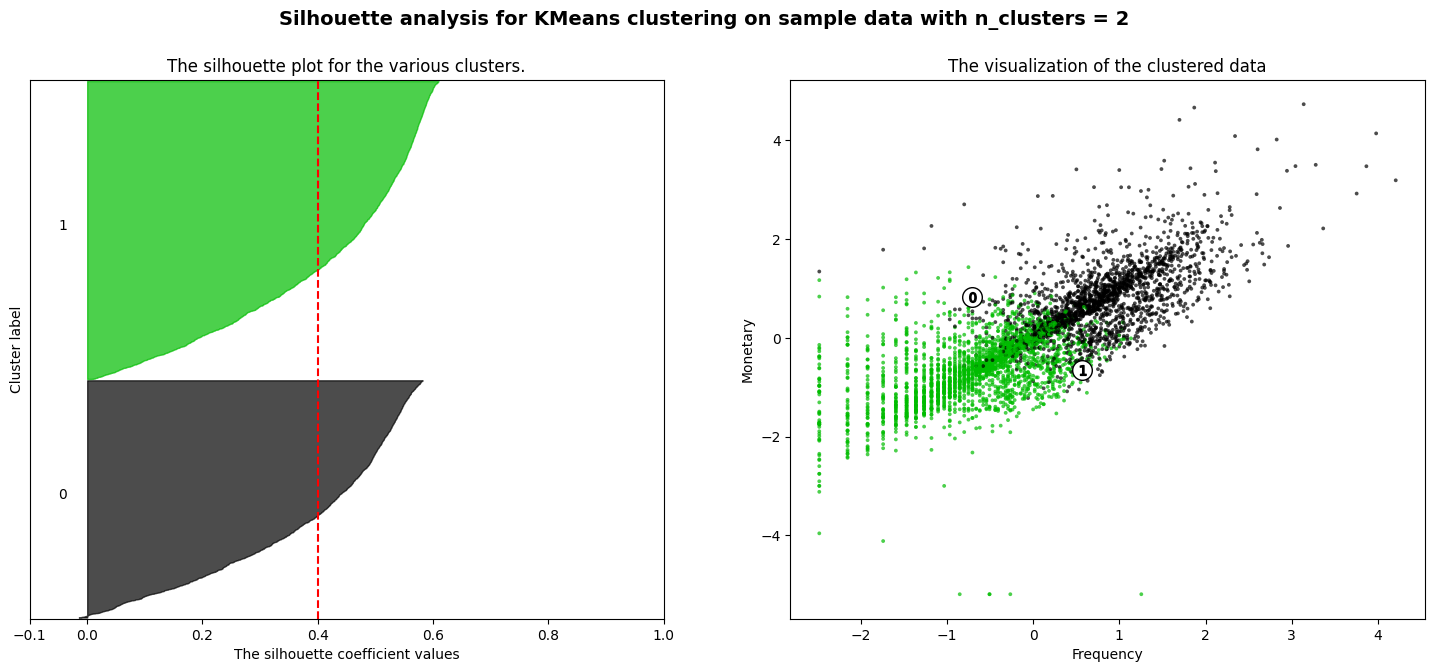

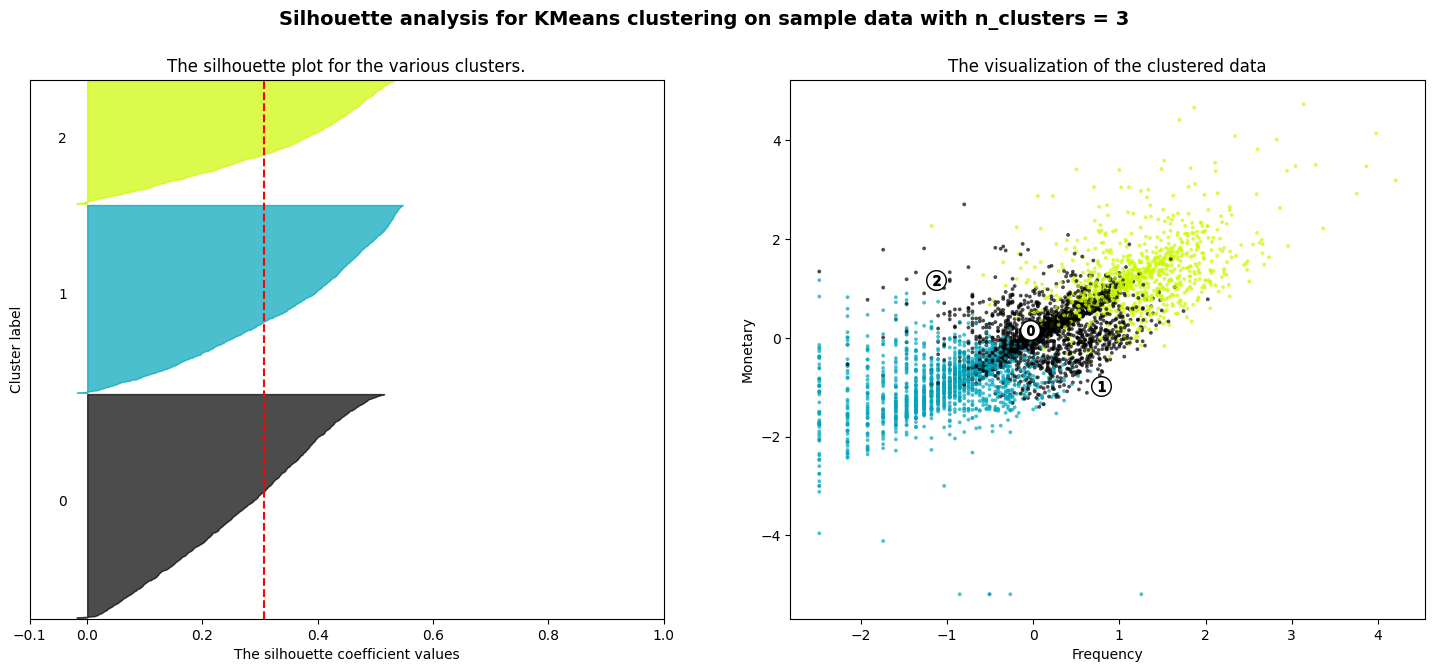

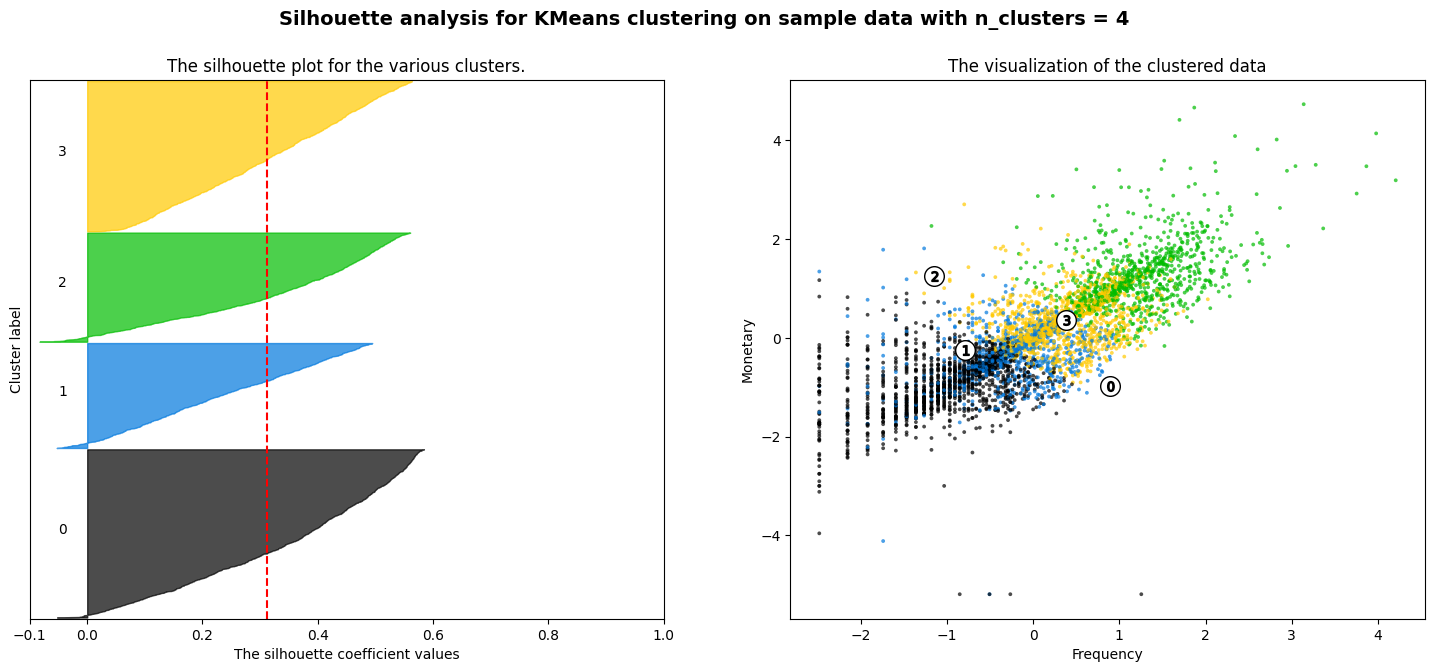

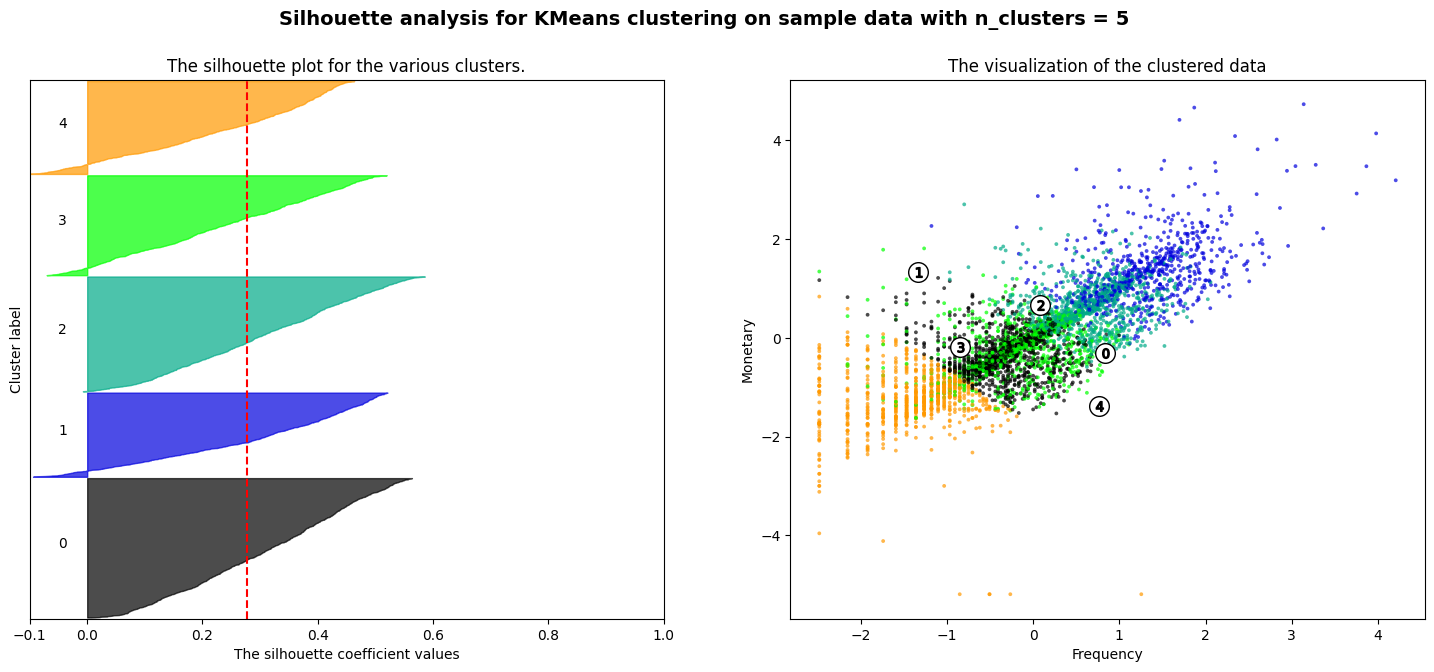

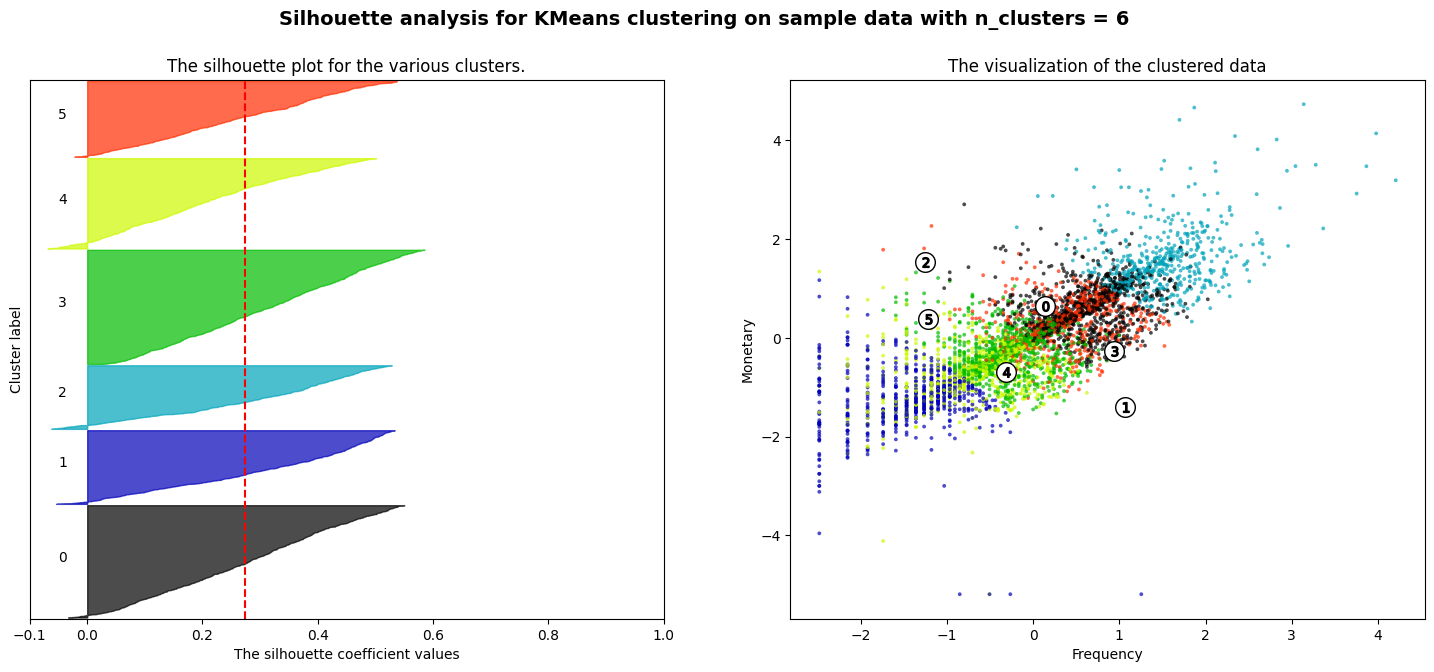

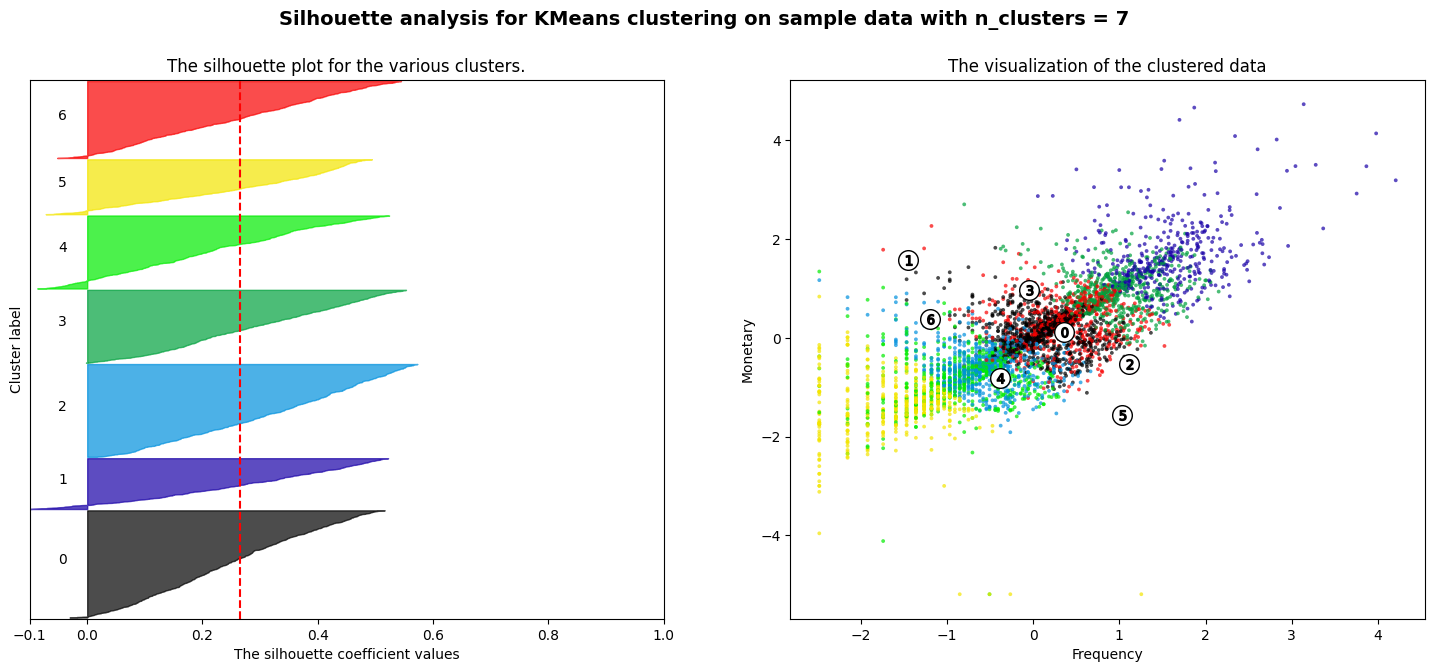

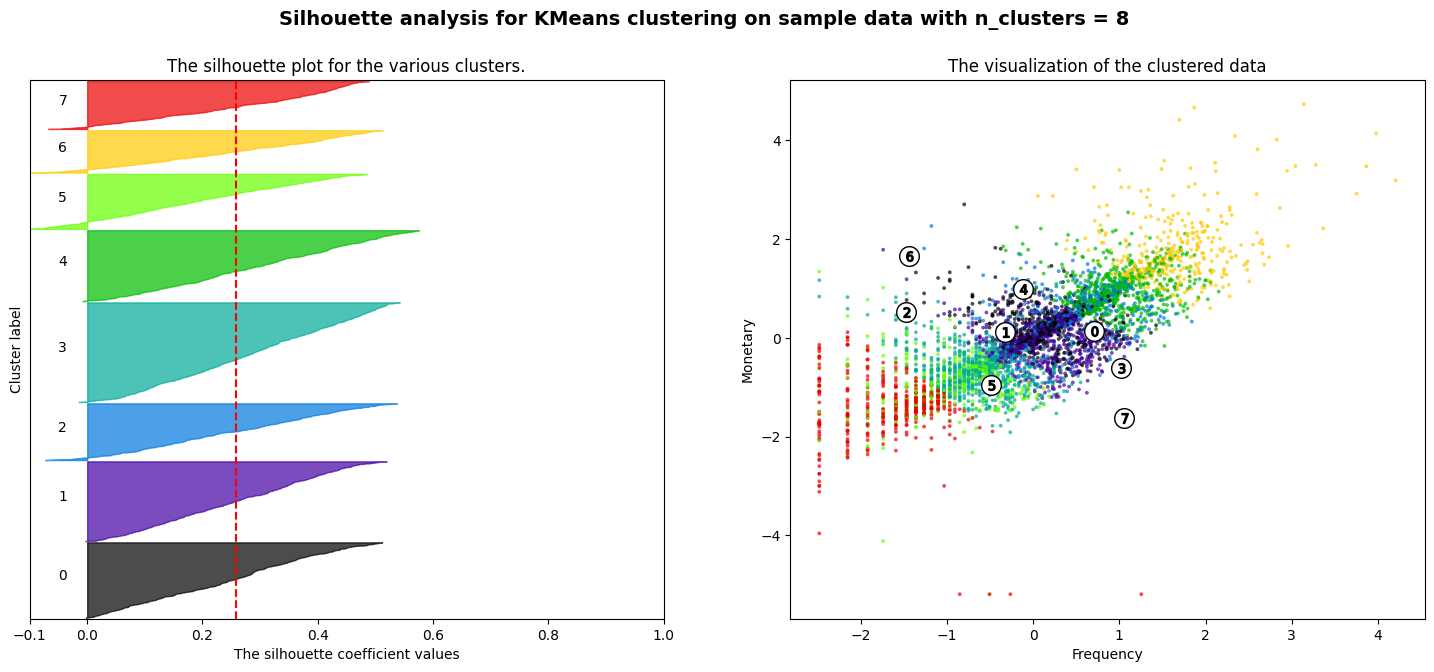

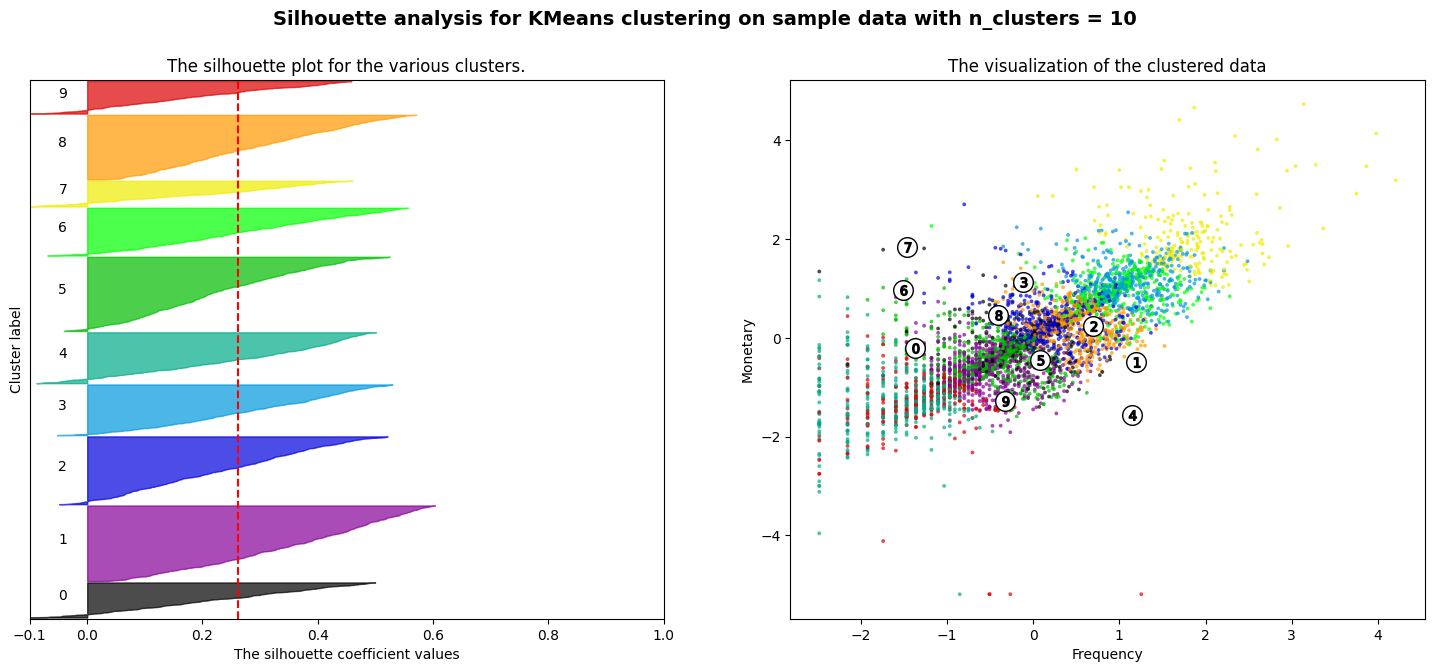

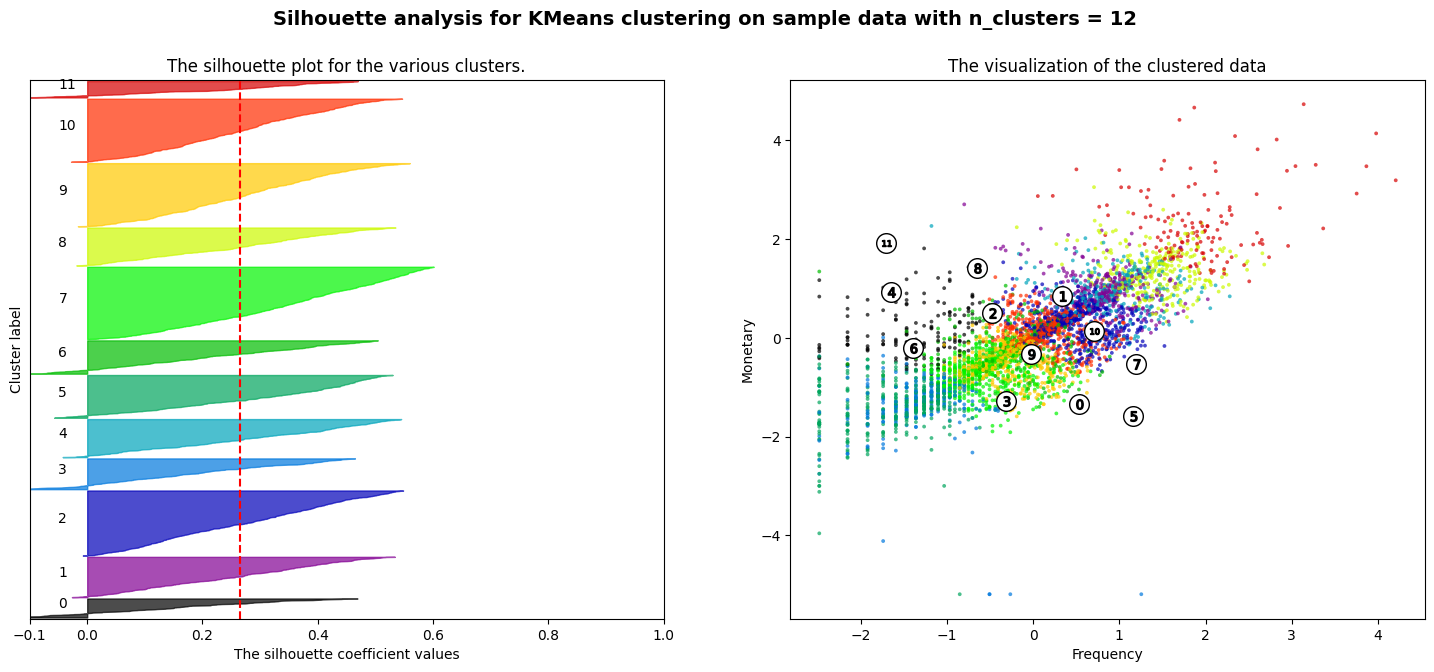

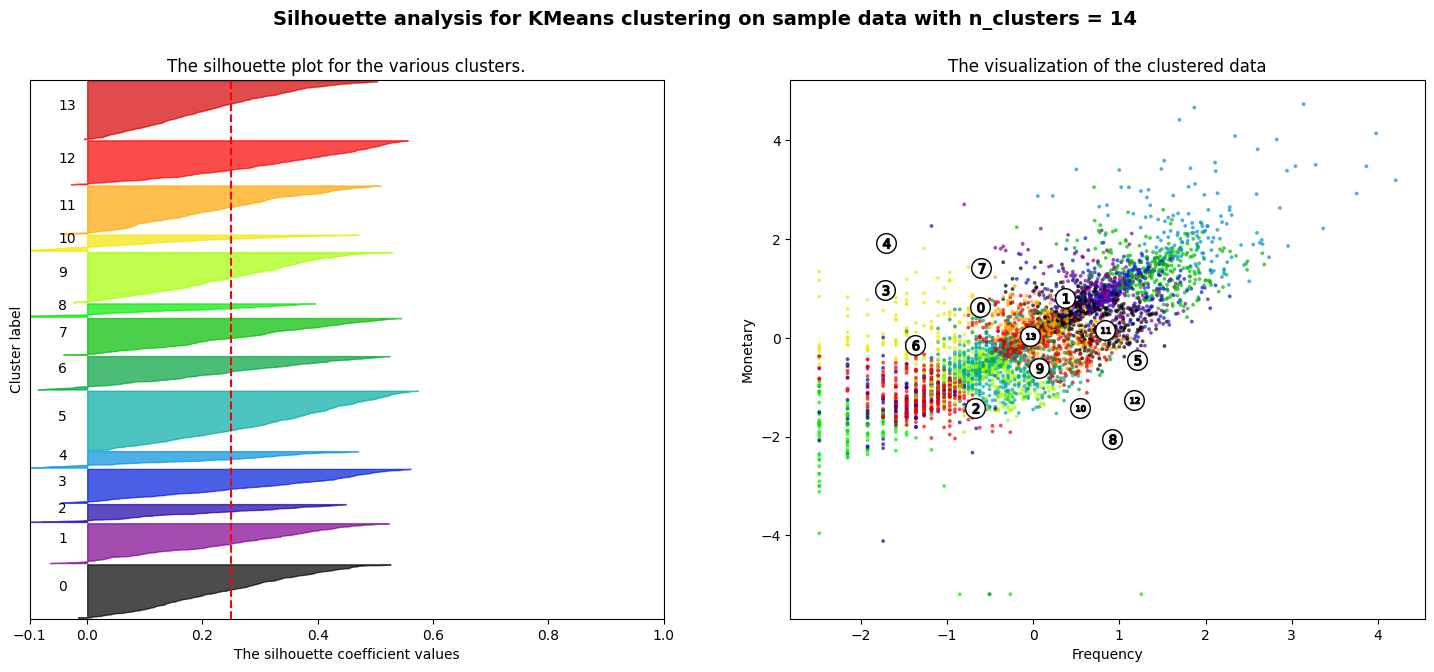

In [45]:
X = df3
range_n_clusters = [2, 3, 4, 5, 6,7,8,10,12,14]
for n_clusters in range_n_clusters:
    global str
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,)
    cluster_labels = clusterer.fit_predict(X)

    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, i)

        y_lower = y_upper + 10 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

   
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X["Frequency"], X["Monetary"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Frequency")
    ax2.set_ylabel("Monetary")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [47]:
df4 = df3.assign(Cluster = clus_labels)
df4.head(3)

,Recency,Frequency,Monetary,Cluster
0,-1.969228,1.171002,1.431403,0
1,0.401617,-0.238345,0.739514,1
2,-0.577641,0.439216,0.721853,0


In [48]:
df4_melt = pd.melt(df4.reset_index(), id_vars=['Cluster'],value_vars=['Recency', 'Frequency', 'Monetary'], var_name='Attribute',
value_name='Value')

In [49]:
df4_melt.head(3)

,Cluster,Attribute,Value
0,0,Recency,-1.969228
1,1,Recency,0.401617
2,0,Recency,-0.577641


<Axes: title={'center': 'Segment plot'}, xlabel='Attribute', ylabel='Value'>

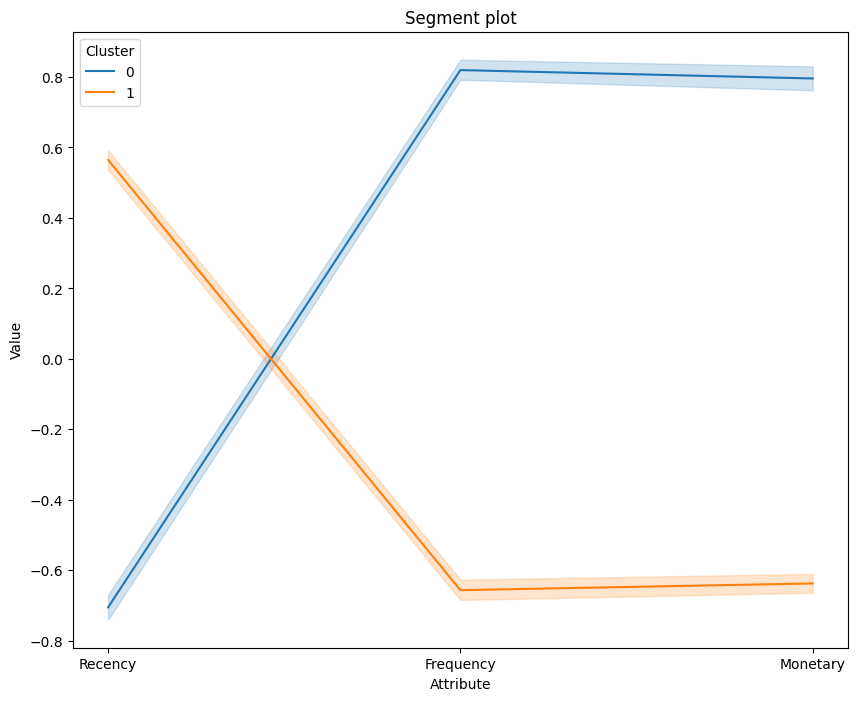

In [50]:
plt.figure(figsize = (10,8))
plt.title('Segment plot') 
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=df4_melt)

# **Relative feature importances w.r.t clusters**

In [51]:
cluster_avg = df1_clus2.groupby(['Cluster']).mean()
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,29.262747,177.187305,3774.293367
1,139.259167,25.311250,432.315297


In [52]:
population_avg = df1.mean()
population_avg

Recency        90.343591
Frequency      92.850764
Monetary     1918.498048
dtype: float64

In [53]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,-0.68,0.91,0.97
1,0.54,-0.73,-0.77


<Axes: title={'center': 'Relative importance of attributes'}, ylabel='Cluster'>

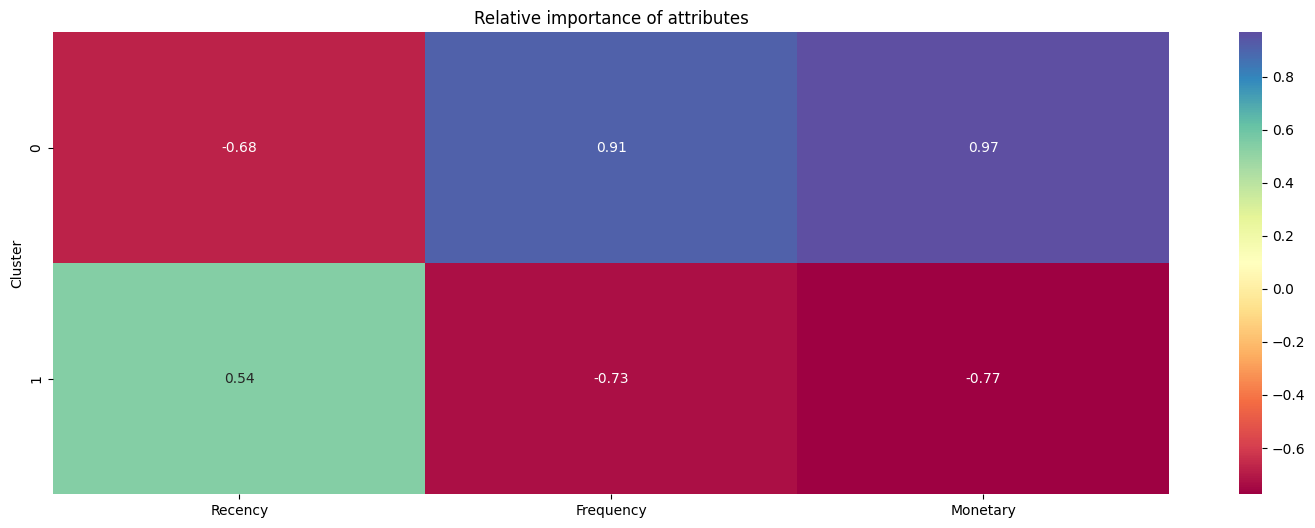

In [54]:
plt.figure(figsize=(18, 6))
plt.title('Relative importance of attributes') 
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Spectral')